In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Import Data

markers is a nested dictionary with marker data loaded into Pandas dataframe per subject and trial.

In [2]:
markers_dir = "./data/markers"

markers = {}
for root, dirs, files in os.walk(markers_dir):
    # print(root)
    # print(dirs)
    # print(files)
    if not files:
        for subject in dirs:
            markers[subject] = {}
    
    head_tail = os.path.split(root)
    print(head_tail[1])
    for file in files:
        root_ext = os.path.splitext(file)
        trial_path = os.path.join(root, file)
        # print(trial_path)
        # root_ext[0]: ND1, ND2, D1, D2, ...
        # print(root_ext[0])
        trial_df = pd.read_csv(trial_path)
        # markers[head_tail[1]][root_ext[0]] = {"trial_df": pd.read_csv(trial_path), 
        #                                       "timestamps": trial_df["Timestamp"].to_numpy(), 
        #                                       "markers": trial_df["Marker"].to_list()}
        markers[head_tail[1]][root_ext[0]] = {"trial_df": trial_df, 
                                              "timestamps": trial_df["Timestamp"].to_numpy(), 
                                              "markers": trial_df["Marker"].to_list()}


markers
subject4
subject6
subject3
subject1
subject5
subject2


## Dictionary Structure

ND = non dominant hand

D = dominant hand

ND and D represent trials and each are dictionary entries that have a pandas Dataframe with all the marker data.

The below cell is boilerplate code for iterating through the dictionary per subject and per trial

In [3]:
for subject, trials in markers.items():
    # print(subject)
    for trial, data in trials.items():
        # print("   ", trial)
        # TODO: print keys of dictionary for each trial
        # print(type(data))
        pass

# Data Filtering

## Experiment Duration Calculation

In [4]:
for subject, trials in markers.items():
    for trial, data in trials.items():
        start_index = data["markers"].index("Experiment Start")
        end_index = data["markers"].index("Experiment End")
#         print(markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment End")] \
#                                                 - markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment Start")])
        
#         markers[subject][trial]["duration"] = markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment End")] \
#                                                 - markers[subject][trial]["timestamps"][markers[subject][trial]["markers"].index("Experiment Start")]
        # print(markers[subject][trial])
        
        # data["duration"] = data["timestamps"][data["markers"].index("Experiment End")] - data["timestamps"][data["markers"].index("Experiment Start")]
        data["experiment_length"] = data["timestamps"][end_index] - data["timestamps"][start_index]
        data.update({"timestamps": np.delete(data["timestamps"], [start_index, end_index])})
        # data.update({"timestamps": np.delete(data["timestamps"], [data["markers"].index("Experiment Start"), data["markers"].index("Experiment End")])})
        data["markers"].remove("Experiment Start")
        data["markers"].remove("Experiment End")
        

In [4]:
for subject, trials in markers.items():
    print(subject)
    for trial, data in trials.items():
        print("   ", trial, " duration: ", data["experiment_length"])
        # print("  trial: ", trial, data["timestamps"])
        

subject4
    ND2  duration:  75.09828199999993
    D1  duration:  71.34434599999986
    ND1  duration:  76.38666000000012
    D2  duration:  70.52425149999999
subject3
    ND2  duration:  70.32544349999989
    D1  duration:  64.3442315000002
    ND1  duration:  74.86595550099992
    D2  duration:  64.12581650000084
subject1
    ND2  duration:  71.09831099999974
    D1  duration:  71.89937199999986
    ND1  duration:  79.94344300000012
    D2  duration:  64.29326599900014
subject5
    ND2  duration:  63.75190549900071
    D1  duration:  75.06746899900008
    ND1  duration:  67.96479
    D2  duration:  66.99032449900005
subject2
    ND2  duration:  83.14426600000024
    D1  duration:  86.88485300000002
    ND1  duration:  87.51868149899974
    D2  duration:  83.3676405000001
subject6
    ND2  duration:  74.32992350100176
    D1  duration:  73.11779449999813
    ND1  duration:  73.91095750000022
    D2  duration:  80.42560199999934


## Check order of markers

In [5]:
def check_list(marker_list):
    for i in range(len(marker_list)-1):
        if marker_list[i] == "Target A Start" and marker_list[i+1] != "Target A End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target A End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target A End" and marker_list[i+1] != "Goal A Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal A Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal A Start" and marker_list[i+1] != "Goal A End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal A End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target B Start" and marker_list[i+1] != "Target B End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target B End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target B End" and marker_list[i+1] != "Goal B Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal B Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal B Start" and marker_list[i+1] != "Goal B End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal B End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target C Start" and marker_list[i+1] != "Target C End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target C End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target C End" and marker_list[i+1] != "Goal C Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal C Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal C Start" and marker_list[i+1] != "Goal C End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal C End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target D Start" and marker_list[i+1] != "Target D End":
            print("csv has issues at index: ", i)
            print("Next marker should be Target D End but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Target D End" and marker_list[i+1] != "Goal D Start":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal D Start but is ", marker_list[i+1])
            break
        elif marker_list[i] == "Goal D Start" and marker_list[i+1] != "Goal D End":
            print("csv has issues at index: ", i)
            print("Next marker should be Goal D End but is ", marker_list[i+1])
            break
        # TODO: it's possible to shorten the code for this tremendously. Add case when goal ends, next must be target start

# If no error messages, then good
for subject, trials in markers.items():
    print(subject)
    for trial, data in trials.items():
        print("Trial: ", trial)
        check_list(data["markers"])

subject4
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject6
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject3
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject1
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject5
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2
subject2
Trial:  ND2
Trial:  ND1
Trial:  D1
Trial:  D2


## Duration Calculations

Adds durations (duration of target and goal fixations) and positions (target A, B, C or D) to main dictionary

In [6]:
def calculate_duration(timestamp_list, marker_list):
    if len(marker_list) % 4:
        print(len(marker_list))
        print("List not correct size! Please check input list")
        return None, None
    else:
        durations = np.zeros((int(len(marker_list)/4), 2))
        positions = []
        for i in range(durations.shape[0]):
            start_index = i*4
            if marker_list[start_index] == "Target A Start" and marker_list[start_index+1] == "Target A End" and marker_list[start_index+2] == "Goal A Start" and marker_list[start_index+3] == "Goal A End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("A")
            elif marker_list[start_index] == "Target B Start" and marker_list[start_index+1] == "Target B End" and marker_list[start_index+2] == "Goal B Start" and marker_list[start_index+3] == "Goal B End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("B")
            elif marker_list[start_index] == "Target C Start" and marker_list[start_index+1] == "Target C End" and marker_list[start_index+2] == "Goal C Start" and marker_list[start_index+3] == "Goal C End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("C")
            elif marker_list[start_index] == "Target D Start" and marker_list[start_index+1] == "Target D End" and marker_list[start_index+2] == "Goal D Start" and marker_list[start_index+3] == "Goal D End":
                durations[i,0] = timestamp_list[start_index+1] - timestamp_list[start_index]
                durations[i,1] = timestamp_list[start_index+3] - timestamp_list[start_index+2]
                positions.append("D")
            else:
                print("Order of markers is not right!")
                break
        durations[:,0]/durations[:,1] # check if duration lengths are same
        return durations, positions
    

for subject, trials in markers.items():
    # print(subject)
    for trial, data in trials.items():
        # print("Trial: ", trial)
        duration, position = calculate_duration(data["timestamps"], data["markers"])
        data["durations"] = duration
        data["positions"] = position

# Average Subject Analysis

Put durations of all trials in a lists depending on dominant or non-dominant and attemp number

In [7]:
def get_durations(marker_dict, target_trial):
    durations_list = []
    positions = []
    for subject, trials in marker_dict.items():
        for trial, data in trials.items():
            if trial.startswith(target_trial):
                durations_list.append(data["durations"])
                positions.extend(data["positions"])
    target_durations = np.vstack(durations_list)
    return target_durations, positions

In [80]:

D_durations, D_positions = get_durations(markers, "D")
ND_durations, ND_positions = get_durations(markers, "ND")

D1_durations, D1_positions = get_durations(markers, "D1")
D2_durations, D2_positions = get_durations(markers, "D2")

ND1_durations, ND1_positions = get_durations(markers, "ND1")
ND2_durations, ND2_positions = get_durations(markers, "ND2")

# D_mean = np.mean(D_durations[:,0] + D_durations[:,1])
# ND_mean = np.mean(ND_durations[:,0] + ND_durations[:,1])

# D1_mean = np.mean(D1_durations[:,0] + D1_durations[:,1])
# ND1_mean = np.mean(ND1_durations[:,0] + ND1_durations[:,1])

# D2_mean = np.mean(D2_durations[:,0] + D2_durations[:,1])
# ND2_mean = np.mean(ND2_durations[:,0] + ND2_durations[:,1])

all_durations, all_positions = get_durations(markers, "")
all_norm = np.mean(all_durations[:,0] + all_durations[:,1])

In [9]:
def sort_durations(duration_array, position_list):
    a_durations = []
    b_durations = []
    c_durations = []
    d_durations = []
    for i in range(len(position_list)):
        if position_list[i] == "A":
            a_durations.append([duration_array[i][0], duration_array[i][1]])
        elif position_list[i] == "B":
            b_durations.append([duration_array[i][0], duration_array[i][1]])
        elif position_list[i] == "C":
            c_durations.append([duration_array[i][0], duration_array[i][1]])
        elif position_list[i] == "D":
            d_durations.append([duration_array[i][0], duration_array[i][1]])
            
    durations_sorted = [np.array(a_durations), np.array(b_durations), np.array(c_durations), np.array(d_durations)]
    return durations_sorted
                                

In [79]:
D_durations_sorted = sort_durations(D_durations, D_positions)
ND_durations_sorted = sort_durations(ND_durations, ND_positions)

D1_durations_sorted = sort_durations(D1_durations, D1_positions)
D2_durations_sorted = sort_durations(D2_durations, D2_positions)

ND1_durations_sorted = sort_durations(ND1_durations, ND1_positions)
ND2_durations_sorted = sort_durations(ND2_durations, ND2_positions)


## Plot

### Scatter Plots

Plot Helper Functions

In [57]:
def plot_scatter_sorted(axis, sorted_durations, normalization = 1):
    for i in range(len(sorted_durations)):
        scatter_label = ''
        marker_color = ''
        if i == 0:
            scatter_label = 'A'
            marker_color = 'blue'
        elif i == 1:
            scatter_label = 'B'
            marker_color = 'orange'
        elif i == 2:
            scatter_label = 'C'
            marker_color = 'green'
        elif i == 3:
            scatter_label = 'D'
            marker_color = 'red'
        # axis.scatter(sorted_durations[i][:,0]/np.mean(sorted_durations[i][:,0]+sorted_durations[i][:,1], 0), 
        #              sorted_durations[i][:,1]/np.mean(sorted_durations[i][:,0]+sorted_durations[i][:,1], 0), label=scatter_label, alpha=0.35, color = marker_color)
        axis.scatter(sorted_durations[i][:,0]/normalization, 
                     sorted_durations[i][:,1]/normalization, label=scatter_label, alpha=0.35, color = marker_color)
        # axis.scatter(sorted_durations[i][:,0]/((sorted_durations[i][:,0]+sorted_durations[i][:,1])/2), 
        #              sorted_durations[i][:,1]/((sorted_durations[i][:,0]+sorted_durations[i][:,1])/2), label=scatter_label, alpha=0.35, color = marker_color)


In [58]:
def plot_scatter_subjects_separate(marker_dict, subject_list, fig_title="", normalization = 1):
    fig = plt.figure(figsize=(15, 10))
    ylimit= 2.25
    xlimit = 1.8
    for subject, trials in marker_dict.items():
        if subject in subject_list:
            for trial, data in trials.items():
                ax = plt.subplot(2, 2, organize_plot(trial))
                duration_ = data["durations"]
                position_ = data["positions"]
                plot_scatter_sorted(ax, sort_durations(duration_, position_), normalization)
                ax.set_title(trial)
                ax.set_ylim(0, ylimit)
                ax.set_xlim(0, xlimit)
                ax.legend(["A", "B", "C", "D"])
                
    fig.add_subplot(1, 1, 1, frameon=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Normalized Target Duration")
    plt.ylabel("Normalized Goal Duration")
    fig.suptitle(fig_title)

In [67]:
def plot_scatter_subjects(marker_dict, subject_list, fig_title="", normalization = 1):
    
    fig, ax = plt.subplots(1,2, figsize=[10,5])
    ylimit= 2.25
    xlimit = 1.8
    # ylimit= 3.5
    # xlimit = 3.5
    
    for subject, trials in marker_dict.items():
        if subject in subject_list:
            for trial, data in trials.items():
                duration_ = data["durations"]
                position_ = data["positions"]
                if trial.startswith("D"):
                    plot_scatter_sorted(ax[0], sort_durations(duration_, position_), normalization)
                elif trial.startswith("ND"):
                    plot_scatter_sorted(ax[1], sort_durations(duration_, position_), normalization)

    ax[0].set_xlim(0, xlimit)
    ax[0].set_ylim(0, ylimit)
    ax[0].set_title("Dominant")
    ax[0].legend(["A", "B", "C", "D"])
    ax[1].set_xlim(0, xlimit)
    ax[1].set_ylim(0, ylimit)
    ax[1].set_title("Non-Dominant")
    ax[1].legend(["A", "B", "C", "D"])


    fig.add_subplot(1, 1, 1, frameon=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Normalized Target Duration")
    plt.ylabel("Normalized Goal Duration")
    fig.suptitle(fig_title)

Text(0.5, 0.98, 'Normalized Durations Averaged over all attempts and subjects')

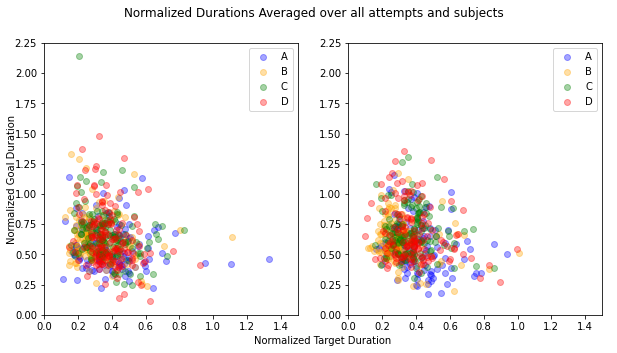

In [66]:
fig_avg, axs_avg = plt.subplots(1,2, figsize=[10,5])

avg_ylimit= 2.25
avg_xlimit = 1.5
# avg_ylimit= 3.5
# avg_xlimit = 3.5

# axs_avg[0].scatter(D_durations[:,0]/D_mean, D_durations[:,1]/D_mean, label='Dominant')
# axs_avg[0].scatter(D_durations[:,0]/np.mean(D_durations[:,0]), D_durations[:,1]/np.mean(D_durations[:,1]), label='Dominant')
plot_scatter_sorted(axs_avg[0], D_durations_sorted, np.mean(all_durations[:,0] + all_durations[:,1]))
axs_avg[0].set_xlim(0, avg_xlimit)
axs_avg[0].set_ylim(0, avg_ylimit)
axs_avg[0].legend()

# axs_avg[1].scatter(ND_durations[:,0]/ND_mean, ND_durations[:,1]/ND_mean, label='Non-Dominant')
# axs_avg[1].scatter(ND_durations[:,0]/np.mean(ND_durations[:,0]), ND_durations[:,1]/np.mean(ND_durations[:,1]), label='Non-Dominant')
plot_scatter_sorted(axs_avg[1], ND_durations_sorted, np.mean(all_durations[:,0] + all_durations[:,1]))
axs_avg[1].set_xlim(0, avg_xlimit)
axs_avg[1].set_ylim(0, avg_ylimit)
axs_avg[1].legend()

fig_avg.add_subplot(1, 1, 1, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Normalized Target Duration")
plt.ylabel("Normalized Goal Duration")
fig_avg.suptitle("Normalized Durations Averaged over all attempts and subjects")

Text(0.5, 0.98, 'Normalized Durations of individual attempts for all subjects')

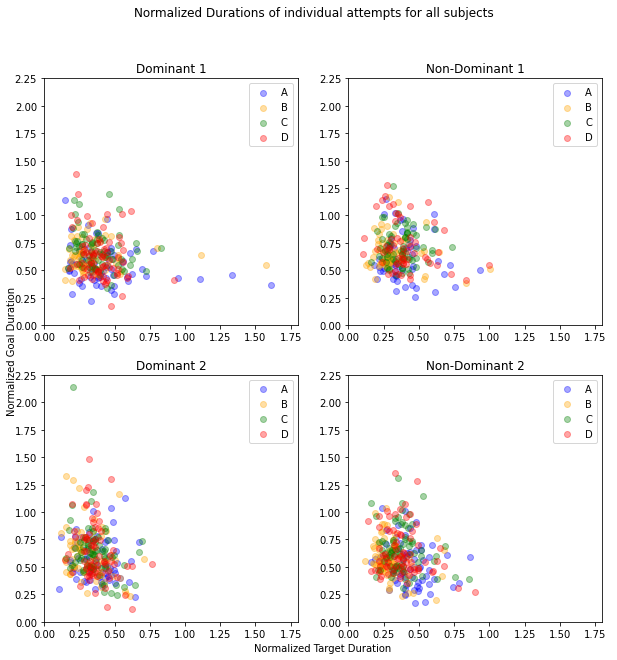

In [65]:
fig, axs = plt.subplots(2, 2, figsize=[10, 10])


ylimit = 2.25
xlimit = 1.8

# axs[0,0].scatter(D1_durations[:,0]/D1_mean, D1_durations[:,1]/D1_mean, label='Dominant 1')
# axs[0,0].scatter(D1_durations[:,0]/np.mean(D1_durations[:,0]), D1_durations[:,1]/np.mean(D1_durations[:,1]), label='Dominant 1')
plot_scatter_sorted(axs[0,0], D1_durations_sorted, np.mean(all_durations[:,0] + all_durations[:,1]))
axs[0,0].set_xlim(0, xlimit)
axs[0,0].set_ylim(0, ylimit)
axs[0,0].set_title("Dominant 1")
axs[0,0].legend()

# axs[0,1].scatter(ND1_durations[:,0]/ND1_mean, ND1_durations[:,1]/ND1_mean, label='Non-Dominant 1')
# axs[0,1].scatter(ND1_durations[:,0]/np.mean(ND1_durations[:,0]), ND1_durations[:,1]/np.mean(ND1_durations[:,1]), label='Non-Dominant 1')
plot_scatter_sorted(axs[0,1], ND1_durations_sorted, np.mean(all_durations[:,0] + all_durations[:,1]))
axs[0,1].set_xlim(0, xlimit)
axs[0,1].set_ylim(0, ylimit)
axs[0,1].set_title("Non-Dominant 1")
axs[0,1].legend()

# axs[1,0].scatter(D2_durations[:,0]/D2_mean, D2_durations[:,1]/D2_mean, label='Dominant 2')
# axs[1,0].scatter(D2_durations[:,0]/np.mean(D2_durations[:,0]), D2_durations[:,1]/np.mean(D2_durations[:,1]), label='Dominant 2')
plot_scatter_sorted(axs[1,0], D2_durations_sorted, np.mean(all_durations[:,0] + all_durations[:,1]))
axs[1,0].set_xlim(0, xlimit)
axs[1,0].set_ylim(0, ylimit)
axs[1,0].set_title("Dominant 2")
axs[1,0].legend()

# axs[1,1].scatter(ND2_durations[:,0]/ND2_mean, ND2_durations[:,1]/ND2_mean, label='Non-Dominant 2')
# axs[1,1].scatter(ND2_durations[:,0]/np.mean(ND2_durations[:,0]), ND2_durations[:,1]/np.mean(ND2_durations[:,1]), label='Non-Dominant 2')
plot_scatter_sorted(axs[1,1], ND2_durations_sorted, np.mean(all_durations[:,0] + all_durations[:,1]))
axs[1,1].set_xlim(0, xlimit)
axs[1,1].set_ylim(0, ylimit)
axs[1,1].set_title("Non-Dominant 2")
axs[1,1].legend()

fig.add_subplot(1, 1, 1, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Normalized Target Duration")
plt.ylabel("Normalized Goal Duration")
fig.suptitle("Normalized Durations of individual attempts for all subjects")

Plot Scatter Plots for All Subjects:

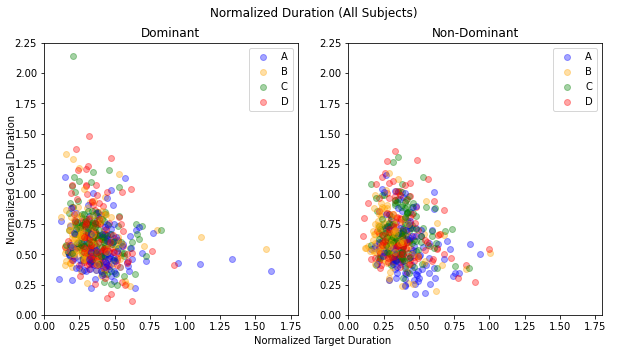

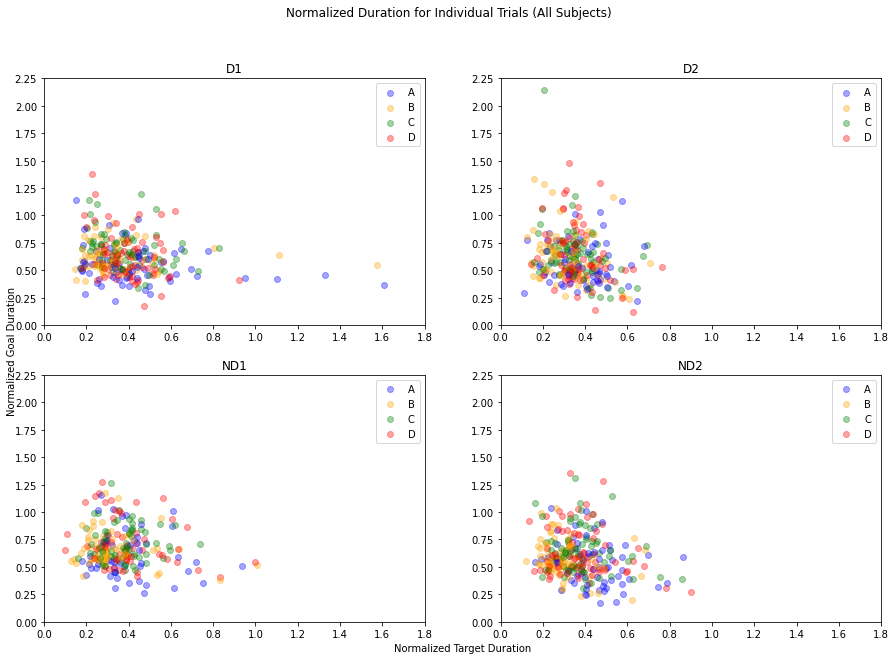

In [81]:
all_subjects = ["subject1", "subject2", "subject3", "subject4", "subject5", "subject6"]
plot_scatter_subjects(markers, all_subjects, "Normalized Duration (All Subjects)", all_norm)
plot_scatter_subjects_separate(markers, all_subjects, "Normalized Duration for Individual Trials (All Subjects)", all_norm)

### Compare left and right handed Data

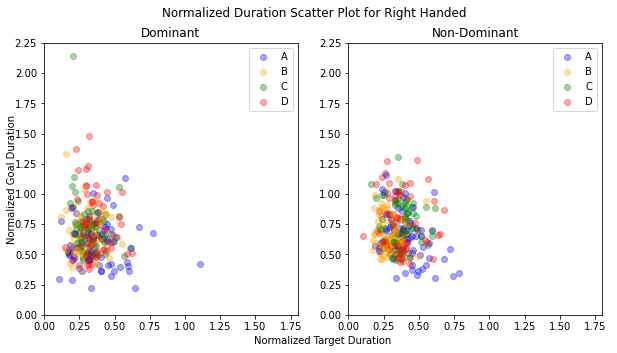

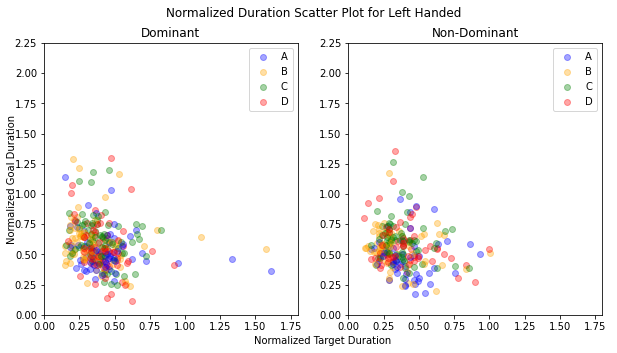

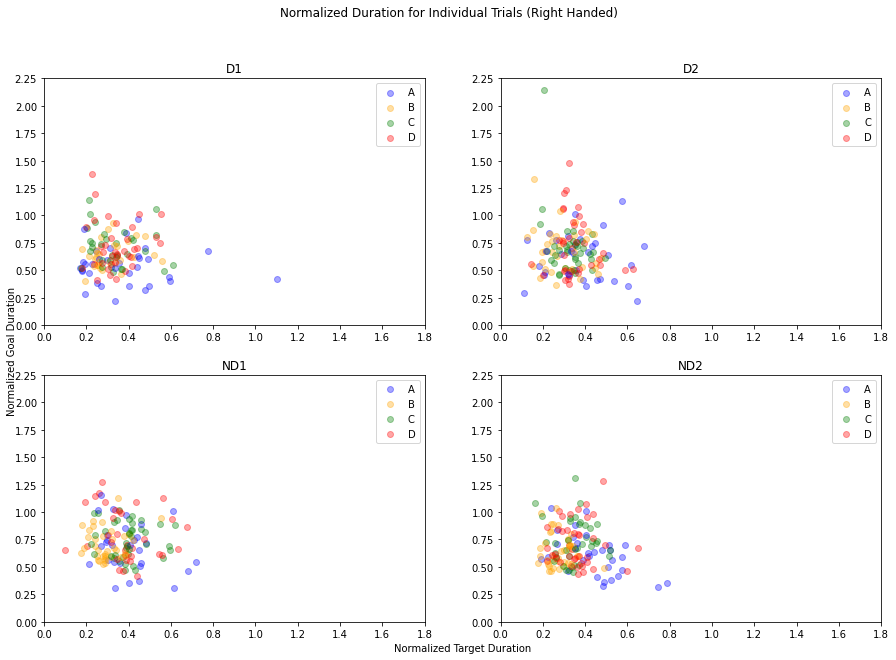

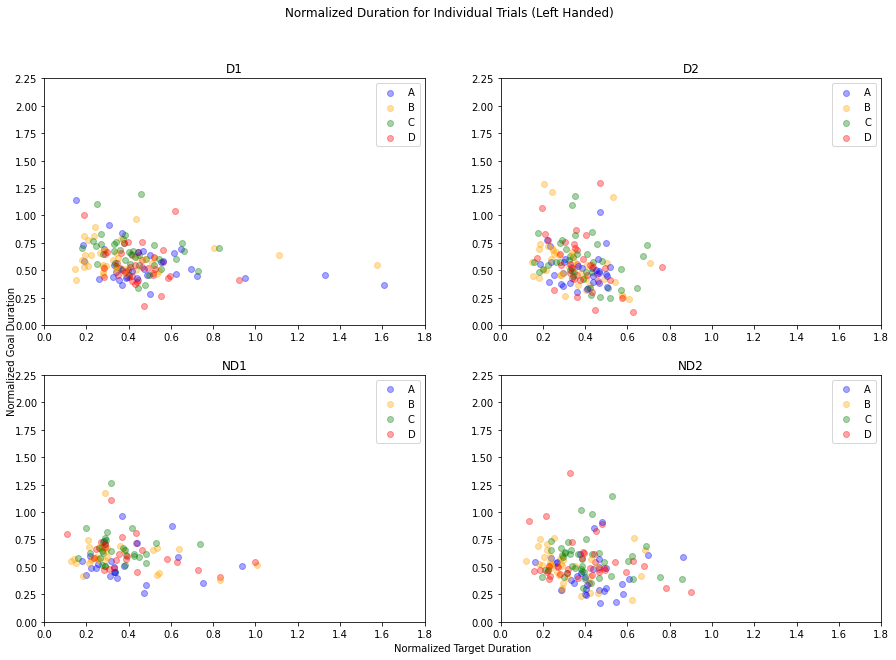

In [82]:
right_handed = ["subject2", "subject3", "subject6"]
left_handed = ["subject1", "subject4", "subject5"]
plot_scatter_subjects(markers, right_handed, "Normalized Duration Scatter Plot for Right Handed", all_norm)
plot_scatter_subjects(markers, left_handed, "Normalized Duration Scatter Plot for Left Handed", all_norm)
plot_scatter_subjects_separate(markers, right_handed, "Normalized Duration for Individual Trials (Right Handed)", all_norm)
plot_scatter_subjects_separate(markers, left_handed, "Normalized Duration for Individual Trials (Left Handed)", all_norm)

### Box Plots

In [47]:
D_ratio = D_durations[:,0]/D_durations[:,1]
ND_ratio = ND_durations[:, 0]/ND_durations[:,1]

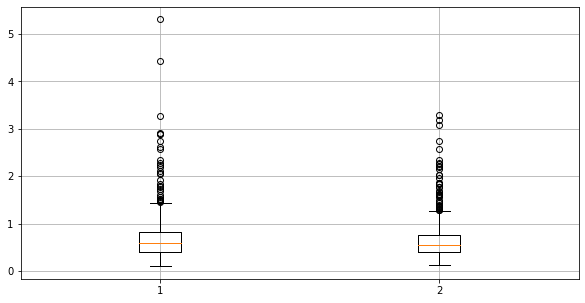

In [94]:
fig_avg_box, ax_avg_box = plt.subplots(figsize=[10, 5])

ax_avg_box.boxplot([D_ratio, ND_ratio], autorange=True)
plt.grid()
#lol

### Progression Plot

In [31]:
def position_labels(axis, duration_array, position_list, target_color="black"):
    for i in range(len(position_list)):
        position_marker = ""
        if position_list[i] == "A":
            position_marker = "^"
        elif position_list[i] == "B":
            position_marker = "+"
        elif position_list[i] == "C":
            position_marker = "*"
        elif position_list[i] == "D":
            position_marker = "o"
            
        axis.scatter(i, duration_array[i], color=target_color, marker=position_marker)

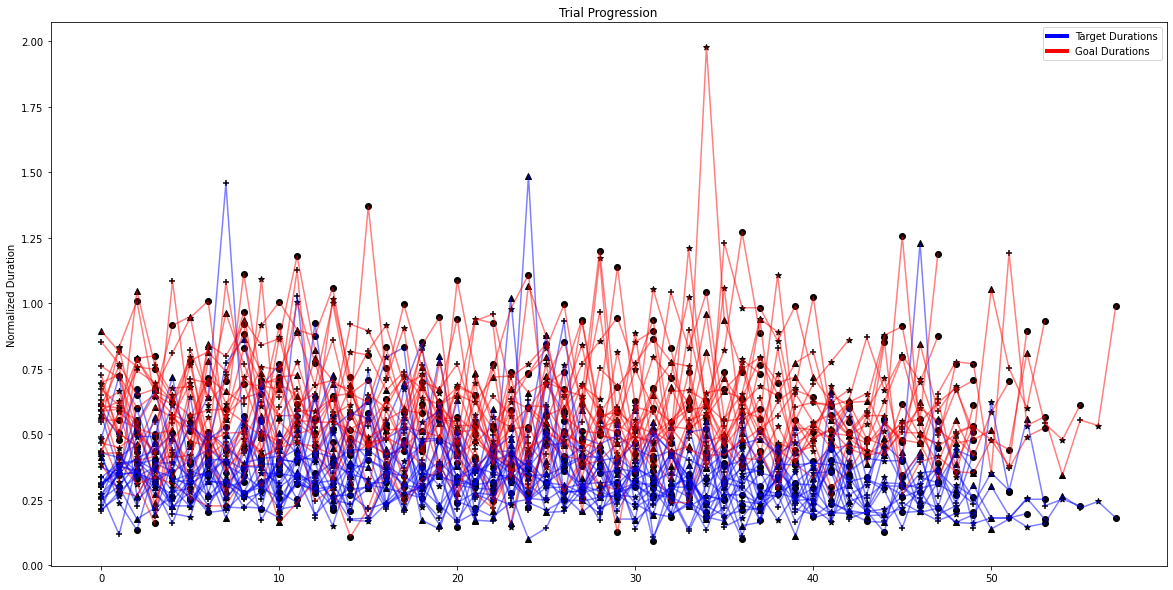

In [37]:
from matplotlib.lines import Line2D

custom_legend = [Line2D([0], [0], color='b', lw=4), 
                 Line2D([0], [0], color='r', lw=4)]

fig_avg_plot, ax_avg_plot = plt.subplots(figsize=[20, 10])

for subject, trials in markers.items():
    # print(subject)
    for trial, data in trials.items():
        # print("   ", trial)
        duration = data["durations"]
        ax_avg_plot.plot(range(0, duration[:,0].shape[0]), duration[:,0], color='b', alpha=0.5)
        # position_labels(ax_avg_plot, data["durations"], 0, data["positions"], "black")
        position_labels(ax_avg_plot, duration[:,0], data["positions"], "black")
        
        ax_avg_plot.plot(range(0, duration[:,1].shape[0]), duration[:,1], color='r', alpha=0.5)
        # position_labels(ax_avg_plot, data["durations"], 1, data["positions"], "black")
        position_labels(ax_avg_plot, duration[:,1], data["positions"], "black")
        
ax_avg_plot.set_ylabel('Normalized Duration')
ax_avg_plot.set_title('Trial Progression')
ax_avg_plot.legend(custom_legend, ['Target Durations', 'Goal Durations'])

# Per Subject Analysis

Plot helper functions

In [71]:
def organize_plot(trial):
    if trial == "D1":
        n = 1
    elif trial == "D2":
        n = 2
    elif trial == "ND1":
        n = 3
    elif trial == "ND2":
        n = 4
    return n

In [86]:
def plot_progression(marker_dict, subject, normalization = 1):
    
    fig = plt.figure(figsize=(15, 10))
    # plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Normalized Progression Plots (tentative) for "+soi)

    for trial, data in marker_dict[subject].items():
        # ax = plt.subplot(2, 2, n)
        ax = plt.subplot(2, 2, organize_plot(trial))

        duration_ = data["durations"]
        position_ = data["positions"]
        ax.plot(range(0, duration_[:,0].shape[0]), duration_[:,0], color='b', alpha=0.5, label="Target Duration")
        position_labels(ax, duration_[:,0], position_, "black")

        ax.plot(range(0, duration_[:,1].shape[0]), duration_[:,1], color='r', alpha=0.5, label="Goal Duration")
        position_labels(ax, duration_[:,1], position_, "black")
        ax.legend()
        ax.set_title(trial)
        ax.set_ylim([0, 2.25])
        
    fig.add_subplot(1, 1, 1, frameon=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Index")
    plt.ylabel("Normalized Fixation Durations (s)")


In [73]:
def plot_ratios(marker_dict, subject):
    # plt.suptitle("Ratio Plots (tentative) for "+soi)
    
    fig, ax = plt.subplots(figsize=[20, 10])

    for trial, data in marker_dict[subject].items():
        duration_ = data["durations"]
        ratio_ = duration_[:,0]/duration_[:,1]
        position_ = data["positions"]
        ax.plot(range(0, duration_[:,0].shape[0]), ratio_, label=trial)
        
        position_labels(ax, ratio_, position_, "black")
        
    ax.legend()
    ax.set_title("Ratio over all trials for "+subject)
    plt.xlabel("Index")
    plt.ylabel("Ratio target vs goal duration")
    

In [89]:
def plot_ratios_separate(marker_dict, subject):
    
    fig = plt.figure(figsize=(15, 10))
    # plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Individual Trial Ratios for "+soi)

    for trial, data in marker_dict[subject].items():
        ax = plt.subplot(2, 2, organize_plot(trial))

        duration_ = data["durations"]
        position_ = data["positions"]
        ratio_ = duration_[:,0]/duration_[:,1]
        ax.plot(range(0, duration_[:,0].shape[0]), ratio_)
        
        position_labels(ax, ratio_, position_, "black")

        ax.set_title(trial)
        ax.set_ylim([0, 3.0])
    
    fig.add_subplot(1, 1, 1, frameon=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Index")
    plt.ylabel("Ratio target/goal duration")
        

In [75]:
def plot_scatter_subject_separate(marker_dict, subject, normalization=1):
    fig = plt.figure(figsize=(15, 10))
    for trial, data in marker_dict[subject].items():
        ax = plt.subplot(2, 2, organize_plot(trial))

        duration_ = data["durations"]
        position_ = data["positions"]

        plot_scatter_sorted(ax, sort_durations(duration_, position_),normalization)
        ax.set_title(trial)
        ax.legend()
        ax.set_ylim([0, 2.5])
        ax.set_xlim([0, 0.8])

    fig.add_subplot(1, 1, 1, frameon=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Normalized Target Duration")
    plt.ylabel("Normalized Goal Duration")
    fig.suptitle("Normalized Duration Scatter Plot for "+soi)

Plot subject specific information:

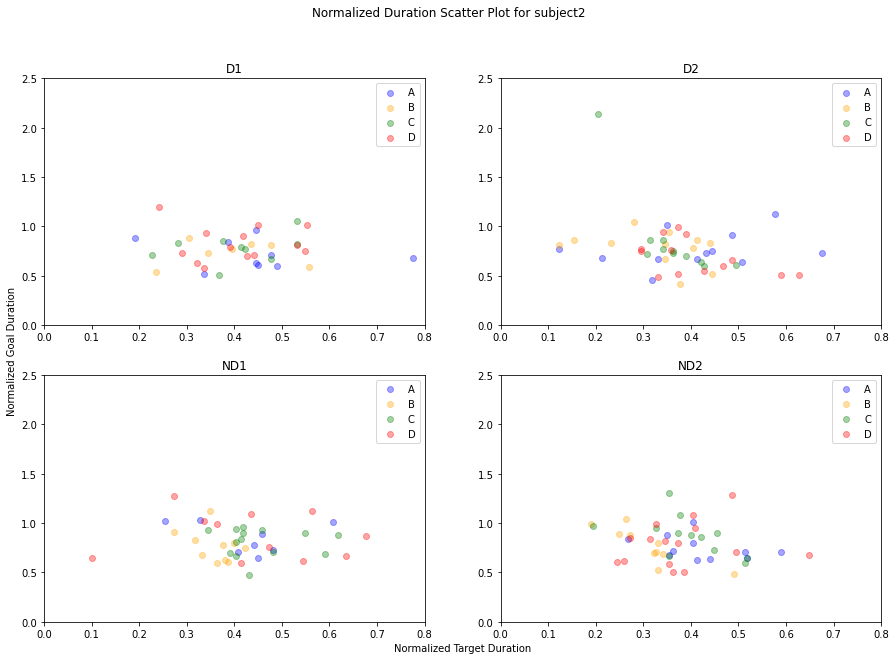

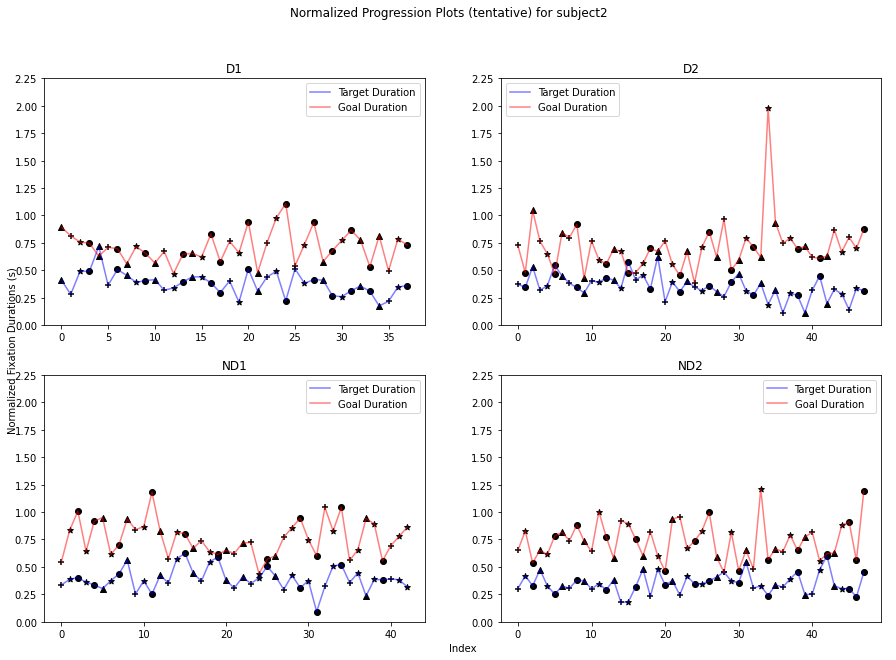

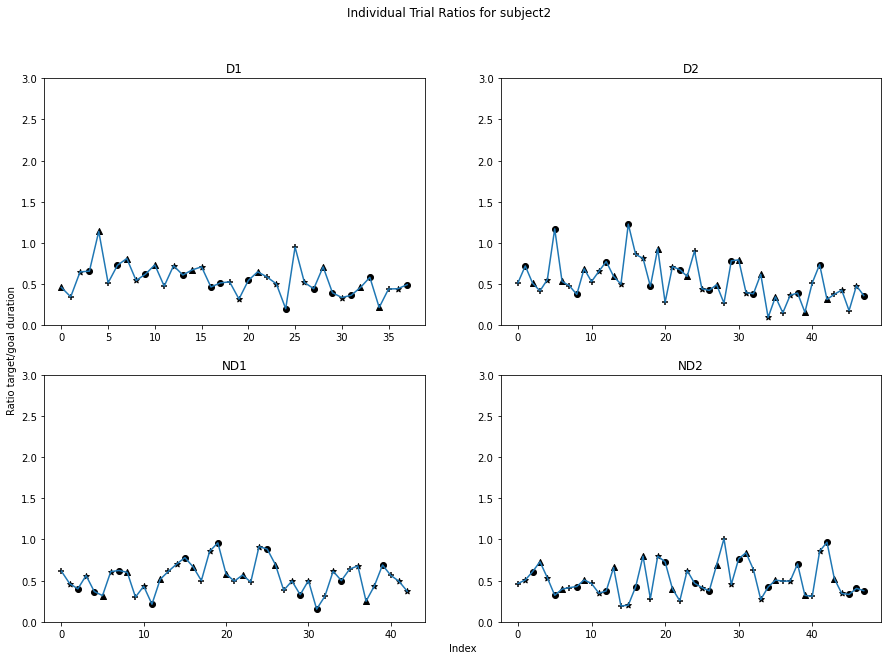

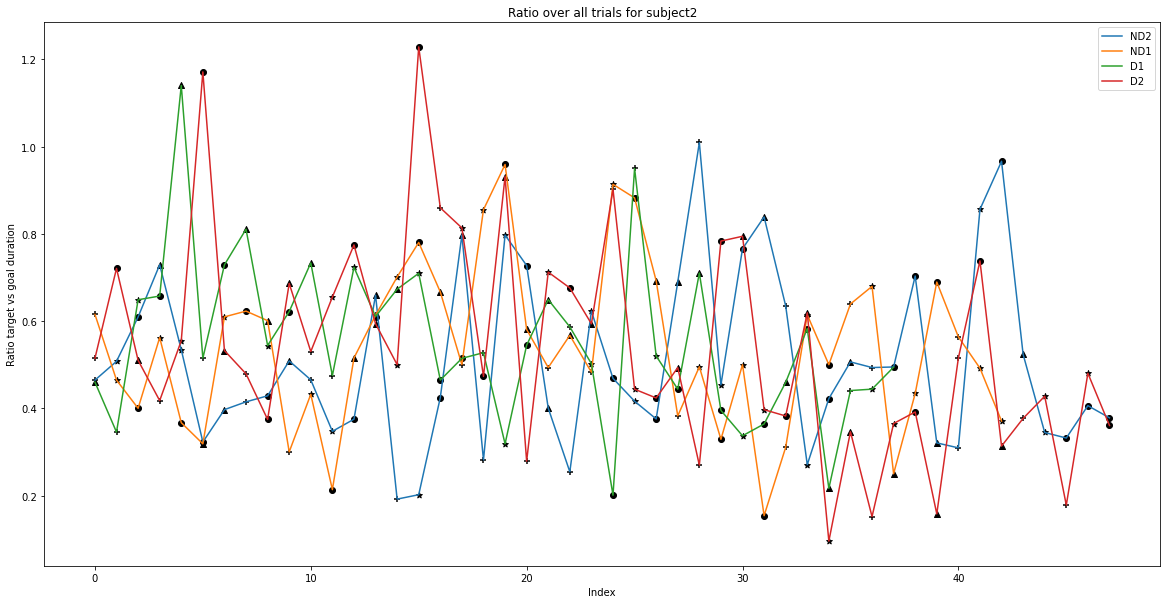

In [93]:
soi = "subject2"

plot_scatter_subject_separate(markers, soi, all_norm)
plot_progression(markers, soi, all_norm)
plot_ratios_separate(markers, soi)
plot_ratios(markers, soi)